In [89]:
%matplotlib inline
%matplotlib widget
import backtrader.plot
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
import tushare as ts
from datetime import datetime
import backtrader as bt
import pandas as pd
import os
import numpy as np


In [2]:
# turnover_rate	float	换手率（%）
# turnover_rate_f	float	换手率（自由流通股）
# volume_ratio	float	量比
# pe	float	市盈率（总市值/净利润）
# pe_ttm	float	市盈率（TTM）
# pb	float	市净率（总市值/净资产）
# ps	float	市销率
# ps_ttm	float	市销率（TTM）
# dv_ratio	float	股息率 （%）
# dv_ttm	float	股息率（TTM）（%）
# total_share	float	总股本 （万股）
# float_share	float	流通股本 （万股）
# free_share	float	自由流通股本 （万）
# total_mv	float	总市值 （万元）
# circ_mv 	float	流通市值（万元）

In [9]:
def get_daily_basic(trade_date):
    try:
        df = pro.daily_basic(ts_code='', trade_date=trade_date, fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb')
    except Exception as e:
        print('Retry, We get error:',e)
        df = get_daily_basic(trade_date)
    return df

def get_income(code,start_date,end_date):
    try:
        income = pro.income(ts_code=code,start_date=start_date,end_date=end_date,fields='ts_code,basic_eps,diluted_eps')
    except Exception as e:
        print('Retry, We get error:',e)
        income = get_income(code,start_date,end_date)
    return income

In [10]:
# ts_code='600515.SH'
# start_date='20190102'
# turnover_rate_T = 6
# last_year = '20190101'
# start_date = '20200313'
PE_T = 15
PB_T = 1
last_year = '20180101'
start_date='20190102' # 往前取30天
start_date='20181202'
end_date='20200103'
mytoken='565ee6d69fb85cb0bc7fdfc8dea4b8ce1f18366f30e8d23a253bb9cf'
ts.set_token(mytoken)
pro = ts.pro_api()
df = get_daily_basic(start_date)
df_choose = df[(df.pe<=PE_T)&(df.pb<=PB_T)]
income = []
for c in df_choose.ts_code:
    df_income = get_income(c, last_year, start_date)
    income.append(df_income['basic_eps'].iloc[0])
df_choose['basic_eps']=income
df_choose_good = df_choose[df_choose.basic_eps>=1.]
print(len(df_choose_good))
df_choose_good

HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
18


ts_code trade_date  turnover_rate  volume_ratio       pe      pb  \
169   601577.SH   20190102         2.6607          0.89   7.3467  0.9652   
283   000001.SZ   20190102         0.3141          0.99   6.8048  0.7330   
323   600782.SH   20190102         0.7008          0.83   5.1050  0.9330   
1210  601229.SH   20190102         0.2823          0.75   7.8493  0.8721   
1515  000732.SZ   20190102         0.2924          0.58   8.1832  0.8495   
1578  601828.SH   20190102         1.3952          1.28   9.3758  0.9258   
1737  601009.SH   20190102         0.3282          0.99   5.5886  0.8334   
1773  600188.SH   20190102         0.3091          1.07   6.2682  0.8606   
1826  600859.SH   20190102         1.4951          1.85  11.3901  0.9727   
1899  000501.SZ   20190102         0.4888          1.54   5.7426  0.8939   
2048  601166.SH   20190102         0.1733          0.87   5.3533  0.7146   
2198  600383.SH   20190102         0.2466          0.87   6.2018  0.9764   
2330  600508.SH   20190102         0.1357          0.80  13.3568  0.7211   
2596  600694.SH   20190102         0.4359          0.94   8.1291  0.9047   
2933  600015.SH   20190102         0.1182          0.97   4.7295  0.5825   
3008  600000.SH   20190102         0.0846          0.89   5.2474  0.6692   
3099  601997.SH   20190102         0.4319          0.88   5.3626  0.8651   
3178  000553.SZ   20190102         0.7272          0.83  14.3703  0.9907   

      basic_eps  
169      1.2100  
283      1.1400  
323      1.2380  
1210     1.3100  
1515     1.1607  
1578     1.0900  
1737     1.0100  
1773     1.1205  
1826     1.2740  
1899     1.0400  
2048     2.3600  
2198     1.1600  
2330     1.0500  
2596     2.6700  
2933     1.0700  
3008     1.4400  
3099     1.6200  
3178     1.0392

In [11]:
# data_path = './data/'
# if not os.path.exists(data_path):
#     os.makedirs(data_path)
# csv_name = f'allname_data.csv'
# csv_path = os.path.join(data_path,csv_name)
# data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
# data.to_csv(csv_path, index=False)
data=pd.read_csv('./data/allname_data.csv')
# ta[data.ts_code.isin(df_choose_good.ts_code)]

ts_code  symbol  name area industry  list_date
0     000001.SZ       1  平安银行   深圳       银行   19910403
97    000501.SZ     501  鄂武商A   湖北       百货   19921120
140   000553.SZ     553  安道麦A   湖北     农药化肥   19931203
272   000732.SZ     732  泰禾集团   福建     区域地产   19970704
2201  600000.SH  600000  浦发银行   上海       银行   19991110
2210  600015.SH  600015  华夏银行   北京       银行   20030912
2356  600188.SH  600188  兖州煤业   山东     煤炭开采   19980701
2522  600383.SH  600383  金地集团   深圳     全国地产   20010412
2608  600508.SH  600508  上海能源   上海     煤炭开采   20010829
2770  600694.SH  600694  大商股份   辽宁       百货   19931122
2852  600782.SH  600782  新钢股份   江西       普钢   19961225
2919  600859.SH  600859   王府井   北京       百货   19940506
3016  601009.SH  601009  南京银行   江苏       银行   20070719
3057  601166.SH  601166  兴业银行   福建       银行   20070205
3076  601229.SH  601229  上海银行   上海       银行   20161116
3111  601577.SH  601577  长沙银行   湖南       银行   20180926
3157  601828.SH  601828   美凯龙   上海     其他商业   20180117
3201  601997.SH  601997  贵阳银行   贵州       银行   20160816

In [69]:
c_list=[]
for c in df_choose_good.ts_code:
    df_holders = pro.top10_holders(ts_code=c, start_date=last_year, end_date=start_date)
    # print(df_holders['holder_name'])
    holder_index = df_holders[df_holders.holder_name.str.contains('保险|基金')].index
    if(len(holder_index)>0):
        if(min(holder_index)<=10):
            c_list.append(c)
c_list
df_choose_good[df_choose_good.ts_code.isin(c_list)]
data[data.ts_code.isin(df_choose_good[df_choose_good.ts_code.isin(c_list)].ts_code)]

ts_code  symbol  name area industry  list_date
0     000001.SZ       1  平安银行   深圳       银行   19910403
140   000553.SZ     553  安道麦A   湖北     农药化肥   19931203
272   000732.SZ     732  泰禾集团   福建     区域地产   19970704
2201  600000.SH  600000  浦发银行   上海       银行   19991110
2210  600015.SH  600015  华夏银行   北京       银行   20030912
2356  600188.SH  600188  兖州煤业   山东     煤炭开采   19980701
2522  600383.SH  600383  金地集团   深圳     全国地产   20010412
2608  600508.SH  600508  上海能源   上海     煤炭开采   20010829
2770  600694.SH  600694  大商股份   辽宁       百货   19931122
2852  600782.SH  600782  新钢股份   江西       普钢   19961225
2919  600859.SH  600859   王府井   北京       百货   19940506
3016  601009.SH  601009  南京银行   江苏       银行   20070719
3057  601166.SH  601166  兴业银行   福建       银行   20070205
3076  601229.SH  601229  上海银行   上海       银行   20161116
3157  601828.SH  601828   美凯龙   上海     其他商业   20180117
3201  601997.SH  601997  贵阳银行   贵州       银行   20160816

In [76]:
data_path = './data/'
if not os.path.exists(data_path):
    os.makedirs(data_path)
mytoken='565ee6d69fb85cb0bc7fdfc8dea4b8ce1f18366f30e8d23a253bb9cf'
# Create a subclass of Strategy to define the indicators and logic
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )
    def __init__(self):
        super().__init__()
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal
    def next(self):
        if not self.position.size:
            if self.crossover > 0:  # if fast crosses slow to the upside
                # self.order_target_size(target=1)  # enter long
                self.order_target_percent(target=1)
                # self.buy()
        elif self.crossover < 0:  # in the market & cross to the downside
            # self.order_target_size(target=0)  # close long position
            # self.close()
            self.order_target_percent(target=0)

class Strategy_runner:
    def __init__(self, strategy, ts_code, start_date, end_date, data_path=data_path, pro=False, token=mytoken):
        self.ts_code = ts_code
        self.start_date = start_date
        self.end_date = end_date
        # convert to datetime
        self.start_datetime = datetime.strptime(start_date,'%Y%m%d')
        self.end_datetime = datetime.strptime(end_date,'%Y%m%d')

    def read_save()
        if pro:
            csv_name = f'pro_day_{str(self.ts_code)}-{str(self.start_date)}-{str(self.end_date)}.csv'
        else:
            csv_name = f'day_{str(ts_code)}-{str(start_date)}-{str(end_date)}.csv'
        csv_path = os.path.join(data_path,csv_name)
        if os.path.exists(csv_path):
            if pro:
                self.df = pd.read_csv(csv_path)
            else:
                self.df = pd.read_csv(csv_path,index_col=0)
        else:
            if pro:
                # self.pro = ts.pro_api()
                # self.df = self.pro.daily(ts_code=self.ts_code, start_date=self.start_date, end_date=self.end_date)
                self.df = self.get_daily()
                if not self.df.empty:
                    self.df.to_csv(csv_path, index=False)
            else:
                self.df = ts.get_hist_data(self.ts_code, str(self.start_datetime), str(self.end_datetime))
                if not self.df.empty:
                    self.df.to_csv(csv_path, index=True)
            
        self.df_bt = self.preprocess(self.df, pro)
        self.strategy = strategy
        self.cerebro = bt.Cerebro()
    
    def get_daily(self):
        ts.set_token(mytoken)
        pro = ts.pro_api()
        try:
            df = pro.daily(ts_code=self.ts_code, start_date=self.start_date, end_date=self.end_date)
        except Exception as e:
            print('Retry, We get error:',e)
            df = self.get_daily()
        return df

    def preprocess(self, df, pro=False):
        if pro:
            features=['open','high','low','close','vol','trade_date']
            # convert_datetime = lambda x:datetime.strptime(x,'%Y%m%d')
            convert_datetime = lambda x: pd.to_datetime(str(x))
            df['trade_date'] = df['trade_date'].apply(convert_datetime)
            bt_col_dict = {'vol':'volume','trade_date':'datetime'}
            df = df.rename(columns=bt_col_dict)
            df = df.set_index('datetime')
            # df.index = pd.DatetimeIndex(df.index)
        else:
            features=['open','high','low','close','volume']
            df = df[features]
            df['openinterest'] = 0
            df.index = pd.DatetimeIndex(df.index)

        df = df[::-1]
        return df

    def run(self):
        data = bt.feeds.PandasData(dataname=self.df_bt,                               
                                    fromdate=self.start_datetime,                               
                                    todate=self.end_datetime)
        self.cerebro.adddata(data)  # Add the data feed
        self.cerebro.addstrategy(self.strategy)  # Add the trading strategy
        # self.cerebro.broker.setcash(1000.0)
        # self.cerebro.addsizer(bt.sizers.FixedSize, stake=100) 
        self.cerebro.broker.setcommission(commission=0.0) #佣金
        self.cerebro.addanalyzer(bt.analyzers.SharpeRatio,_name = 'SharpeRatio')
        self.cerebro.addanalyzer(bt.analyzers.DrawDown, _name='DW')
        self.results = self.cerebro.run()
        strat = self.results[0]
        print('Final Portfolio Value: %.2f' % self.cerebro.broker.getvalue())
        print('SR:', strat.analyzers.SharpeRatio.get_analysis())
        print('DW:', strat.analyzers.DW.get_analysis())
        return self.cerebro, strat
    
    def plot(self, iplot=False):
        plt.rcParams['figure.figsize'] = [15, 8]
        self.cerebro.plot(iplot=iplot)

In [77]:
# ts_code_list = list(df_choose_good.ts_code)
# num = 0
# c_str = ''
# for c in ts_code_list:
#     if num==0:
#         c_str+=str(c)
#     else:
#         c_str+=','+str(c)
#     num+=1
# c_str

In [78]:
len(list(df_choose_good[df_choose_good.ts_code.isin(c_list)].ts_code))

16

Final Portfolio Value: 11585.86
SR: OrderedDict([('sharperatio', 0.5632498892050809)])
DW: AutoOrderedDict([('len', 183), ('drawdown', 14.418443173927809), ('moneydown', 1951.9399999999987), ('max', AutoOrderedDict([('len', 183), ('drawdown', 24.907739810013425), ('moneydown', 3371.9599999999973)]))])
600782.SH


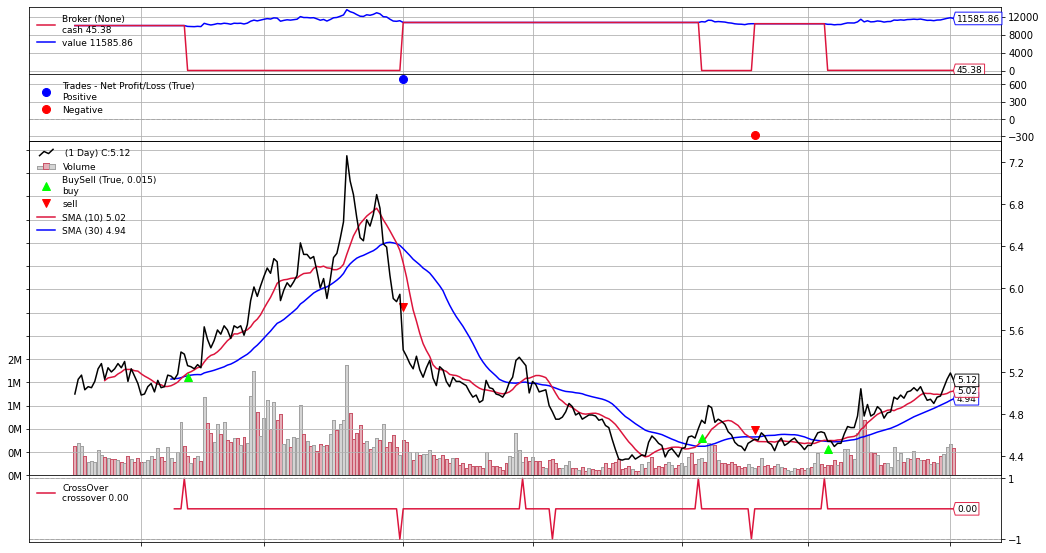

In [99]:
strategy_runner = Strategy_runner(strategy=SmaCross, ts_code=ts_code_list[1], start_date=start_date, end_date=end_date, pro=True)
cerebro, strat = strategy_runner.run()
# cerebro_list.append(cerebro)
# results_list.append(strat)
print(ts_code_list[1])
strategy_runner.plot()

Final Portfolio Value: 11686.40
SR: OrderedDict([('sharperatio', 0.9053162844945357)])
DW: AutoOrderedDict([('len', 58), ('drawdown', 0.8080396550553314), ('moneydown', 95.19999999999891), ('max', AutoOrderedDict([('len', 58), ('drawdown', 6.233448767569768), ('moneydown', 734.3999999999996)]))])


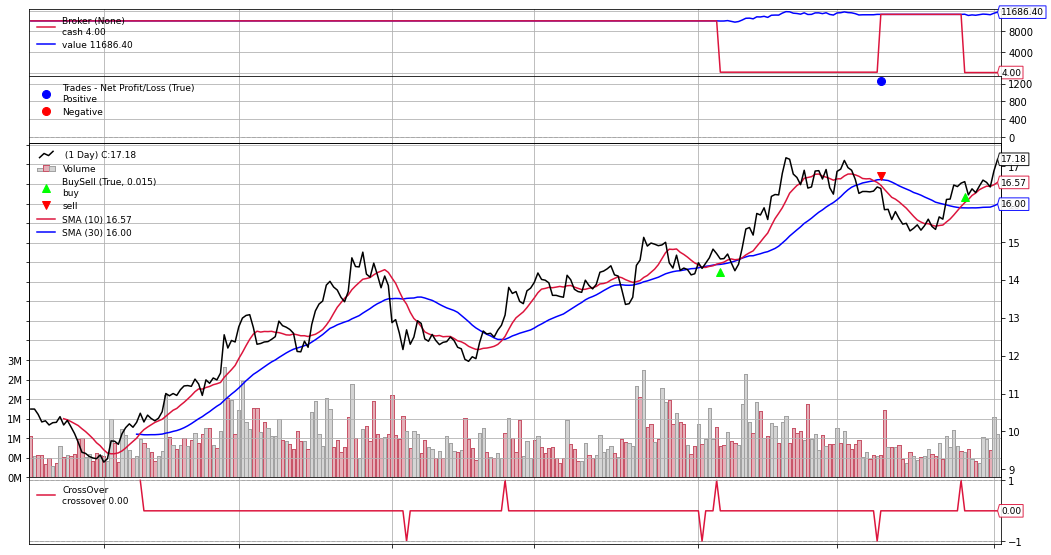

Final Portfolio Value: 11585.86
SR: OrderedDict([('sharperatio', 0.5632498892050809)])
DW: AutoOrderedDict([('len', 183), ('drawdown', 14.418443173927809), ('moneydown', 1951.9399999999987), ('max', AutoOrderedDict([('len', 183), ('drawdown', 24.907739810013425), ('moneydown', 3371.9599999999973)]))])


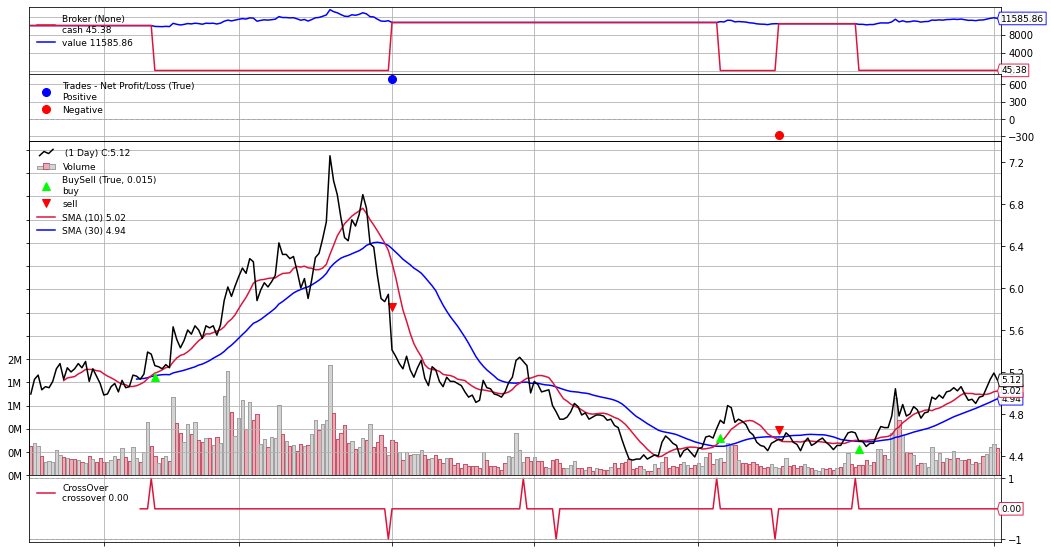

Final Portfolio Value: 9607.70
SR: OrderedDict([('sharperatio', -1.1999280907052166)])
DW: AutoOrderedDict([('len', 177), ('drawdown', 7.868441846371015), ('moneydown', 820.5400000000009), ('max', AutoOrderedDict([('len', 177), ('drawdown', 9.995166969690008), ('moneydown', 1042.3200000000015)]))])


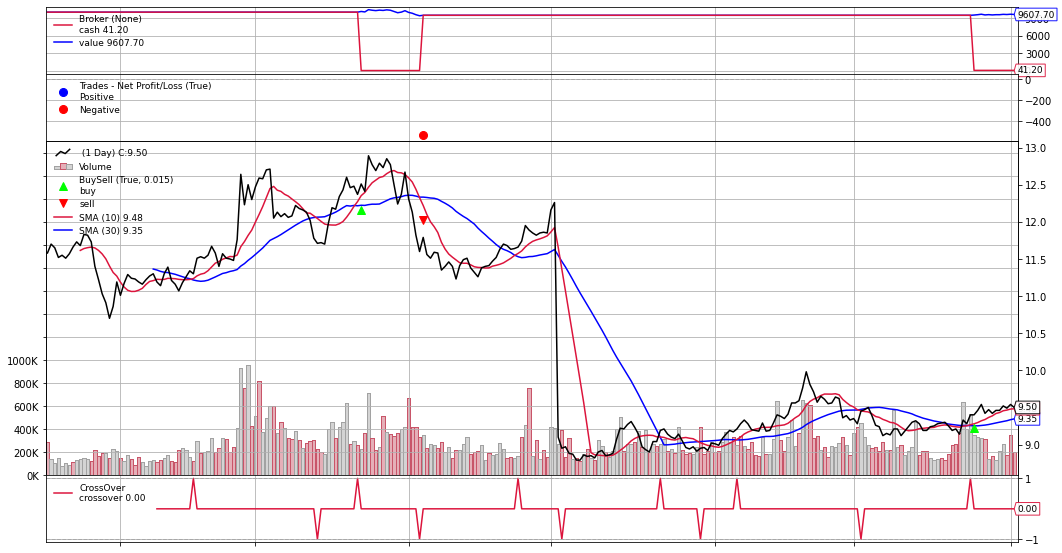

Final Portfolio Value: 5781.14
SR: OrderedDict([('sharperatio', -0.7660370912802175)])
DW: AutoOrderedDict([('len', 186), ('drawdown', 61.48225434954824), ('moneydown', 9227.890000000001), ('max', AutoOrderedDict([('len', 186), ('drawdown', 64.18389462876682), ('moneydown', 9633.380000000001)]))])


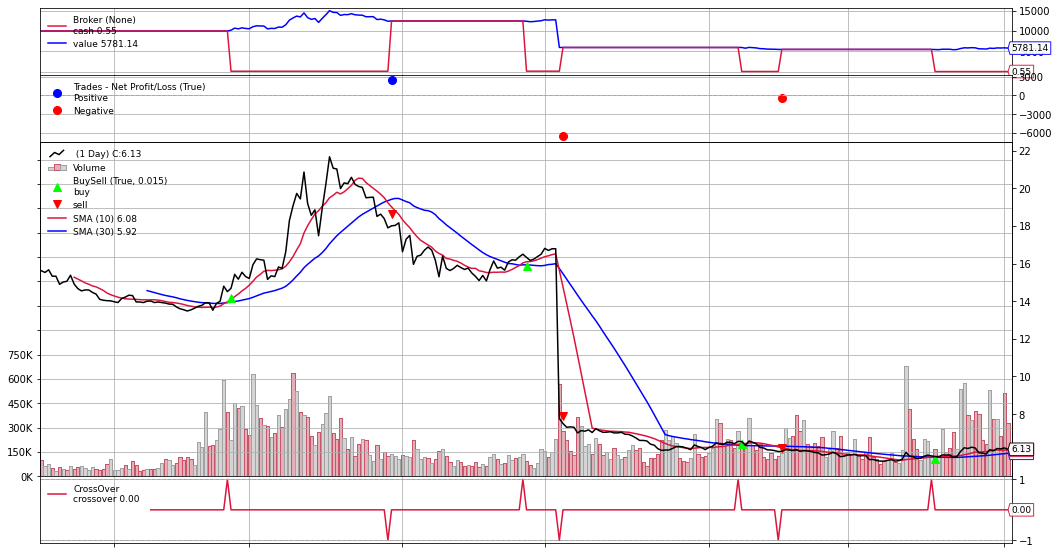

Final Portfolio Value: 9856.64
SR: OrderedDict([('sharperatio', -2.18682242262045)])
DW: AutoOrderedDict([('len', 65), ('drawdown', 5.172095314327939), ('moneydown', 537.6000000000004), ('max', AutoOrderedDict([('len', 65), ('drawdown', 5.689304845760735), ('moneydown', 591.3600000000006)]))])


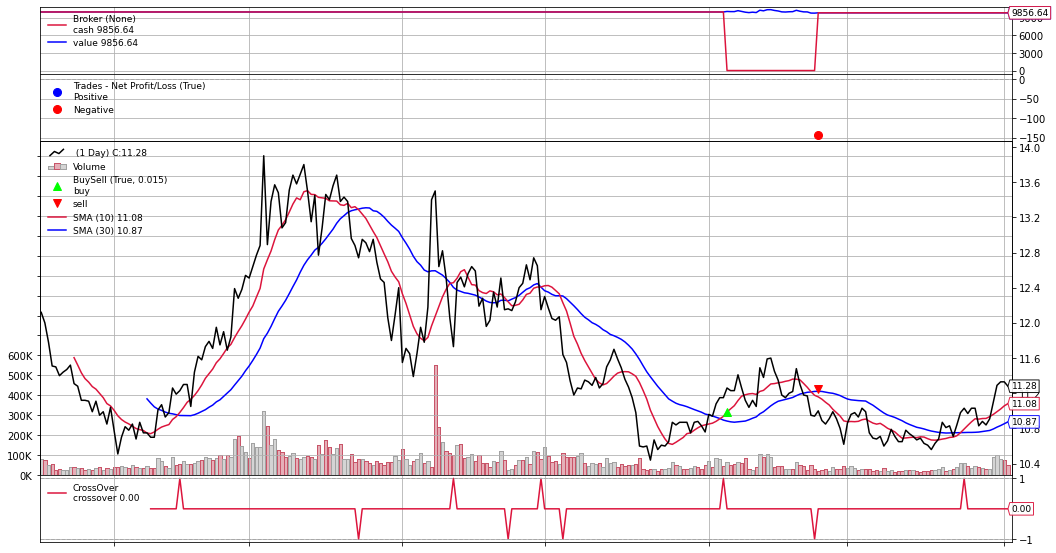

Final Portfolio Value: 12132.58
SR: OrderedDict([('sharperatio', 0.6076347640261295)])
DW: AutoOrderedDict([('len', 177), ('drawdown', 12.375786771051878), ('moneydown', 1713.5699999999997), ('max', AutoOrderedDict([('len', 177), ('drawdown', 13.83380939828039), ('moneydown', 1915.4500000000007)]))])


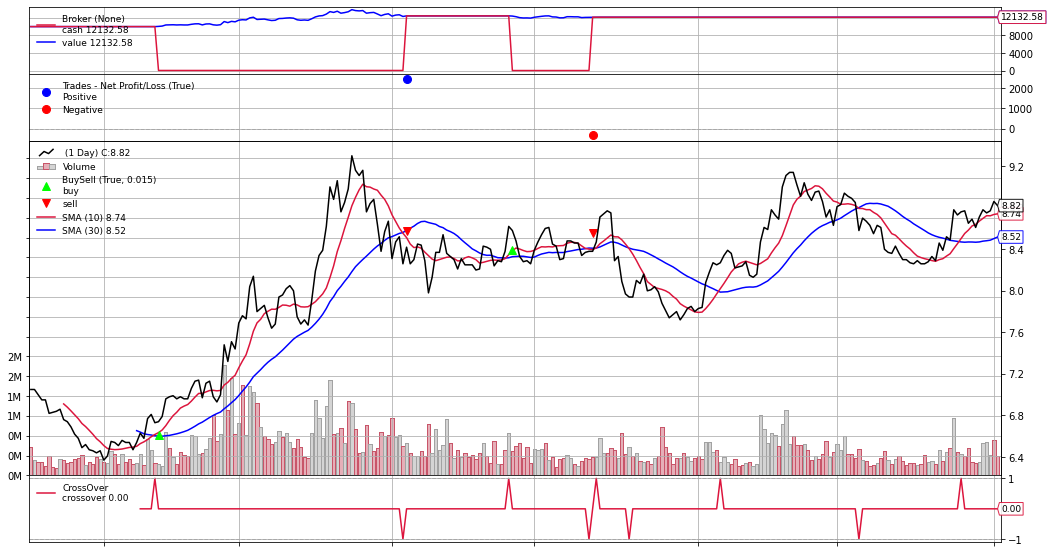

Final Portfolio Value: 12984.10
SR: OrderedDict([('sharperatio', 0.638993385763617)])
DW: AutoOrderedDict([('len', 183), ('drawdown', 7.902884538315681), ('moneydown', 1114.1699999999983), ('max', AutoOrderedDict([('len', 183), ('drawdown', 14.958218277845427), ('moneydown', 2108.8499999999985)]))])


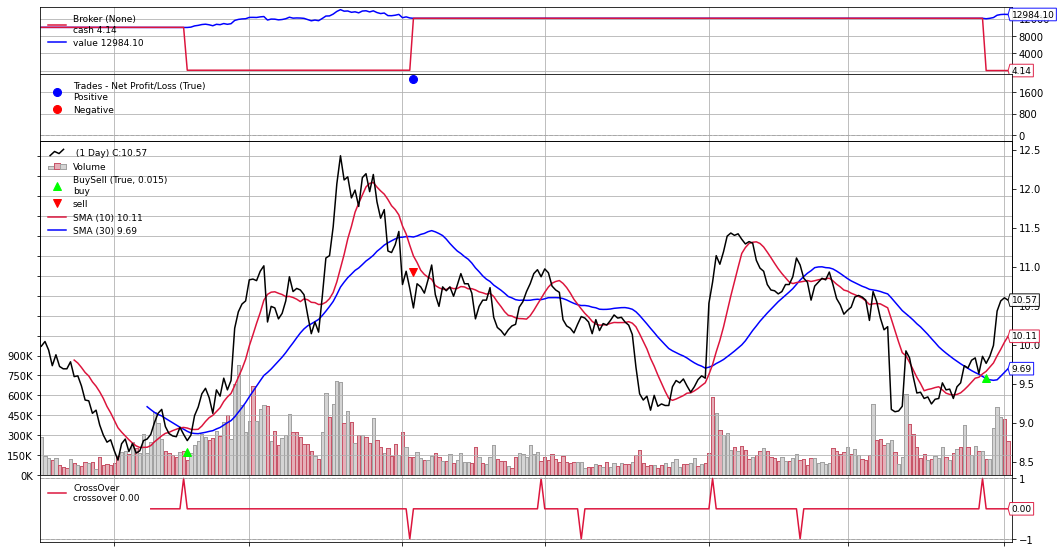

Final Portfolio Value: 10115.50
SR: OrderedDict([('sharperatio', -1.047512552406638)])
DW: AutoOrderedDict([('len', 0), ('drawdown', 0.0), ('moneydown', 0.0), ('max', AutoOrderedDict([('len', 115), ('drawdown', 5.417999999999993), ('moneydown', 541.7999999999993)]))])


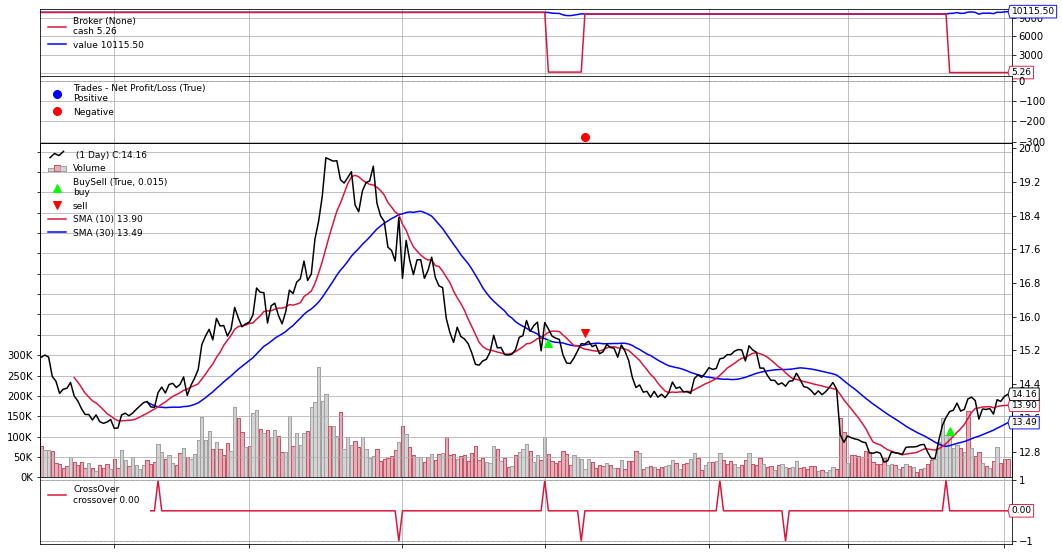

Final Portfolio Value: 10479.69
SR: OrderedDict([('sharperatio', 0.4689939774621355)])
DW: AutoOrderedDict([('len', 177), ('drawdown', 18.286316685757168), ('moneydown', 2345.2000000000025), ('max', AutoOrderedDict([('len', 177), ('drawdown', 19.827070641541585), ('moneydown', 2542.800000000003)]))])


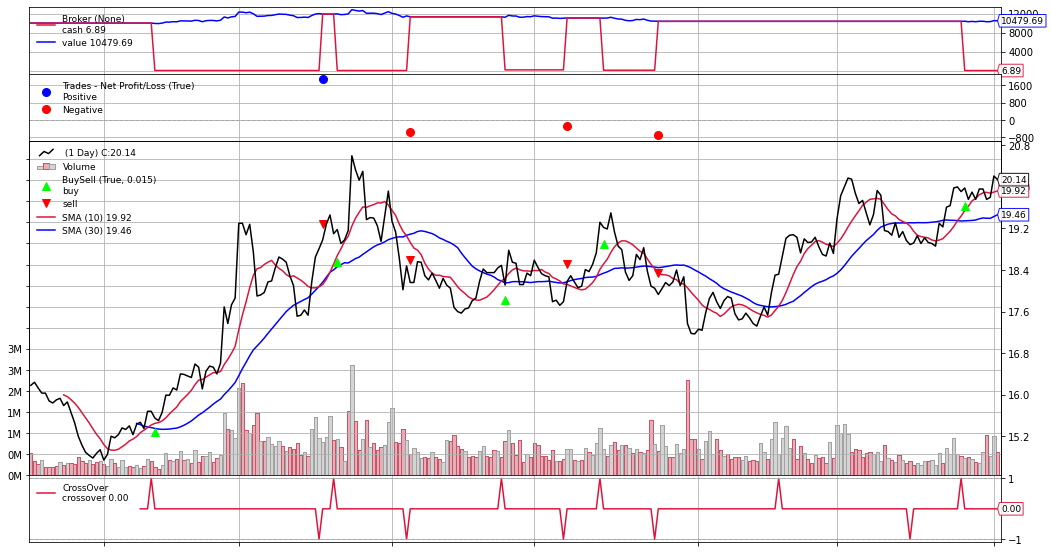

Final Portfolio Value: 10000.00
SR: OrderedDict([('sharperatio', None)])
DW: AutoOrderedDict([('len', 0), ('drawdown', 0.0), ('moneydown', 0.0), ('max', AutoOrderedDict([('len', 0.0), ('drawdown', 0.0), ('moneydown', 0.0)]))])


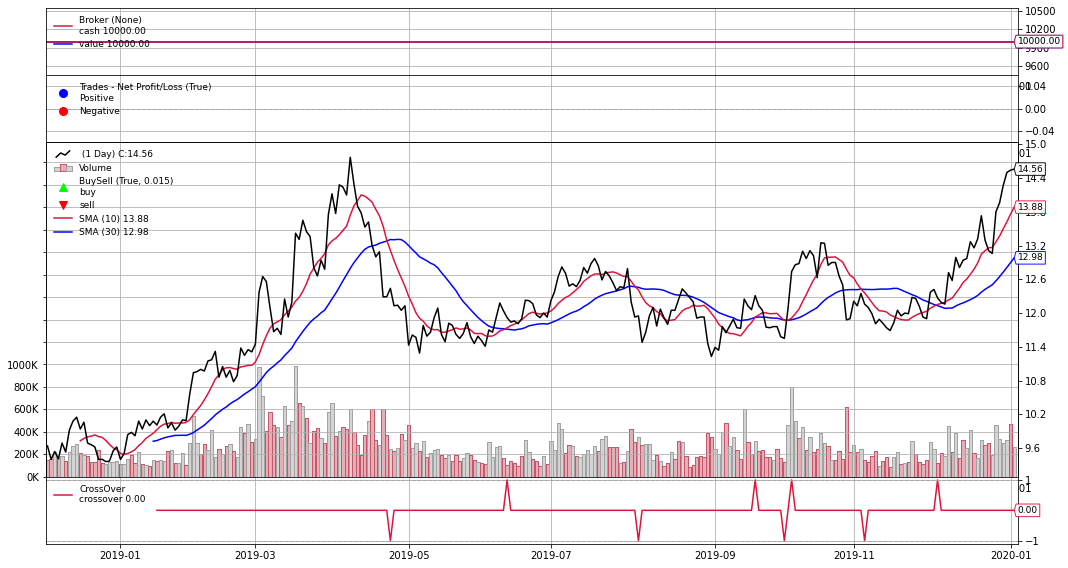

Final Portfolio Value: 10542.18
SR: OrderedDict([('sharperatio', 0.31584920186609133)])
DW: AutoOrderedDict([('len', 198), ('drawdown', 2.6865511823816086), ('moneydown', 291.0400000000009), ('max', AutoOrderedDict([('len', 198), ('drawdown', 7.101858911754775), ('moneydown', 769.3600000000006)]))])


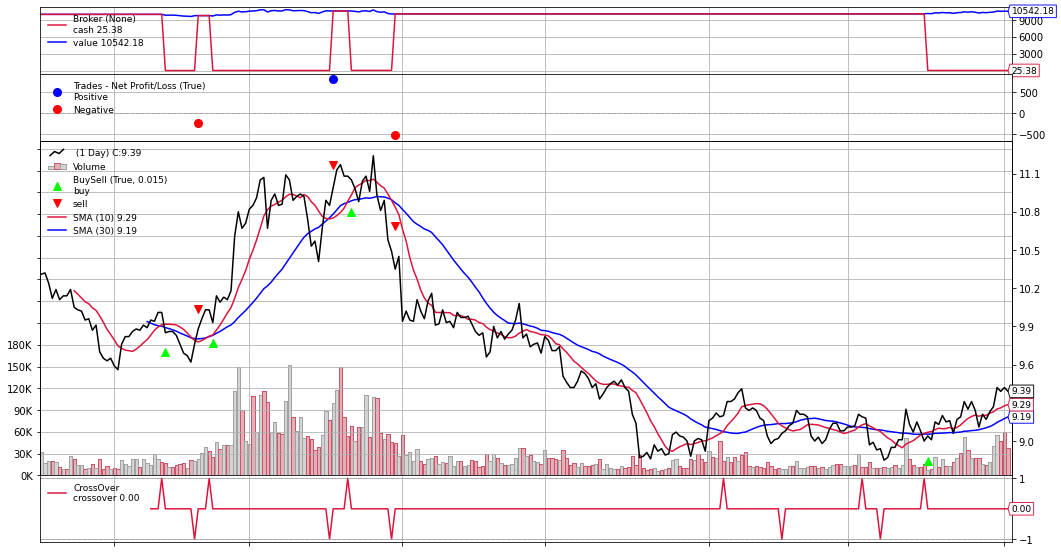

Final Portfolio Value: 8914.91
SR: OrderedDict([('sharperatio', -0.9026039605504386)])
DW: AutoOrderedDict([('len', 122), ('drawdown', 11.467089060141404), ('moneydown', 1154.6899999999987), ('max', AutoOrderedDict([('len', 122), ('drawdown', 11.467089060141404), ('moneydown', 1154.6899999999987)]))])


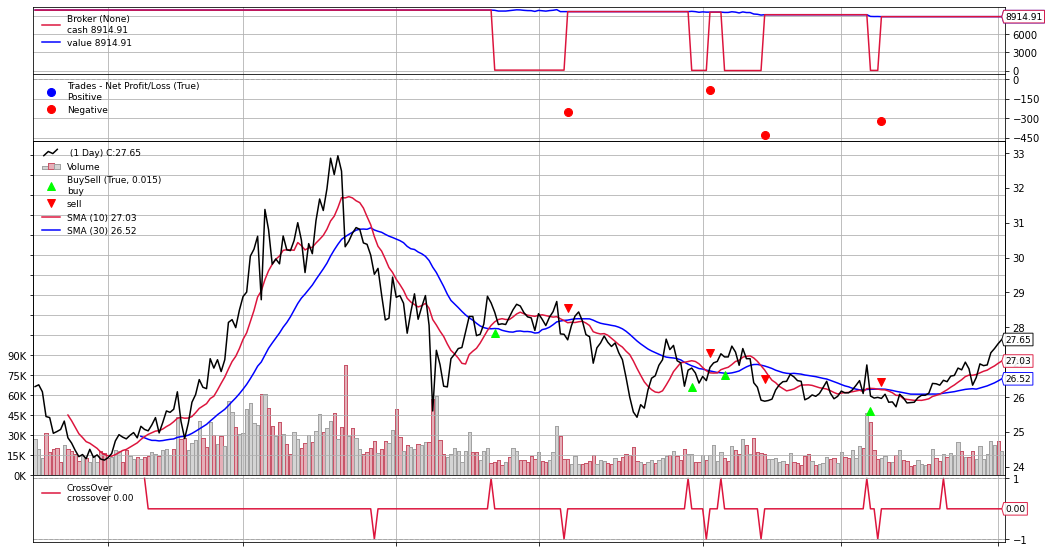

Final Portfolio Value: 9058.90
SR: OrderedDict([('sharperatio', -0.9325153821385871)])
DW: AutoOrderedDict([('len', 175), ('drawdown', 11.99825140858753), ('moneydown', 1235.1000000000004), ('max', AutoOrderedDict([('len', 175), ('drawdown', 13.52127452885175), ('moneydown', 1391.8799999999992)]))])


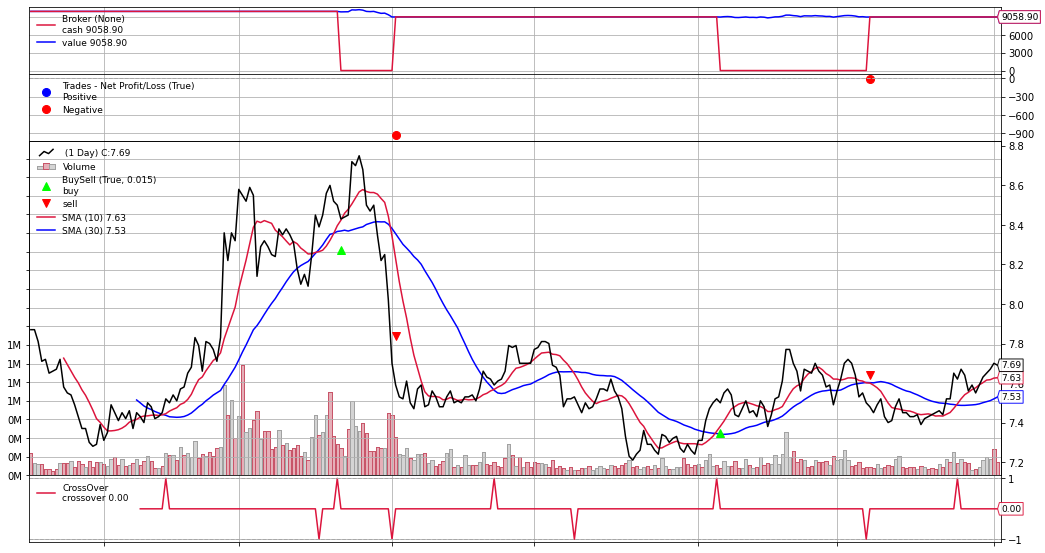

Final Portfolio Value: 9488.19
SR: OrderedDict([('sharperatio', -0.7112214022006709)])
DW: AutoOrderedDict([('len', 174), ('drawdown', 9.45562813422973), ('moneydown', 990.8600000000006), ('max', AutoOrderedDict([('len', 174), ('drawdown', 12.703537057271406), ('moneydown', 1331.2099999999991)]))])


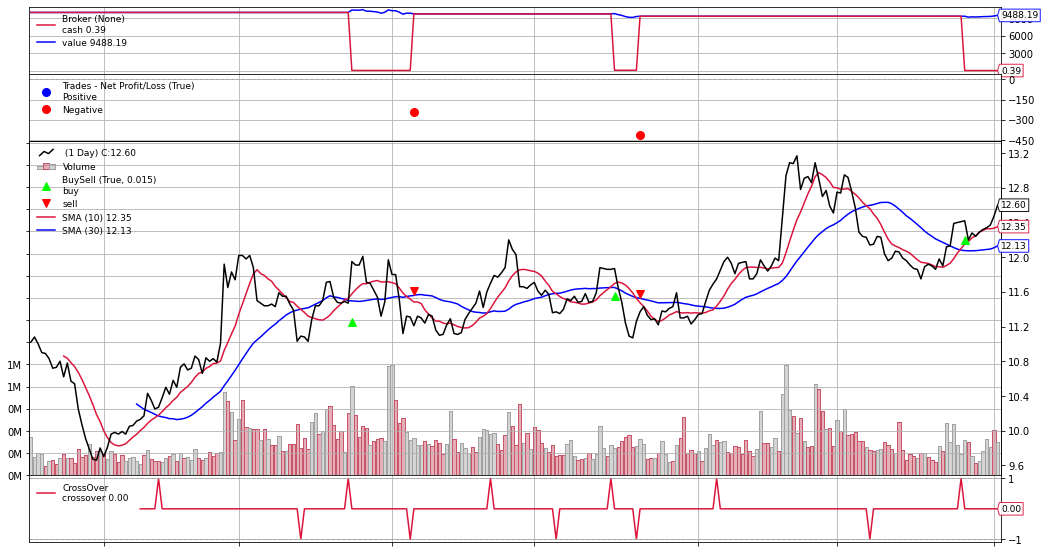

Final Portfolio Value: 11628.72
SR: OrderedDict([('sharperatio', 0.5768621508289881)])
DW: AutoOrderedDict([('len', 177), ('drawdown', 13.79575425156765), ('moneydown', 1861.0099999999966), ('max', AutoOrderedDict([('len', 177), ('drawdown', 15.054637861543549), ('moneydown', 2030.829999999998)]))])


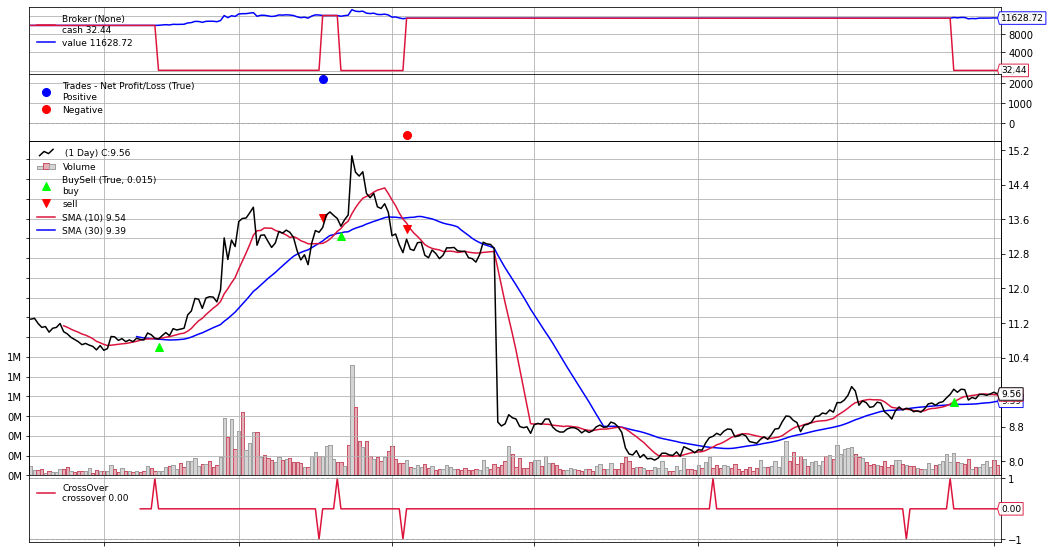

Final Portfolio Value: 10651.06
SR: OrderedDict([('sharperatio', 0.733723478653084)])
DW: AutoOrderedDict([('len', 183), ('drawdown', 26.6468552538696), ('moneydown', 3869.1900000000005), ('max', AutoOrderedDict([('len', 183), ('drawdown', 32.82422823298496), ('moneydown', 4766.159999999998)]))])


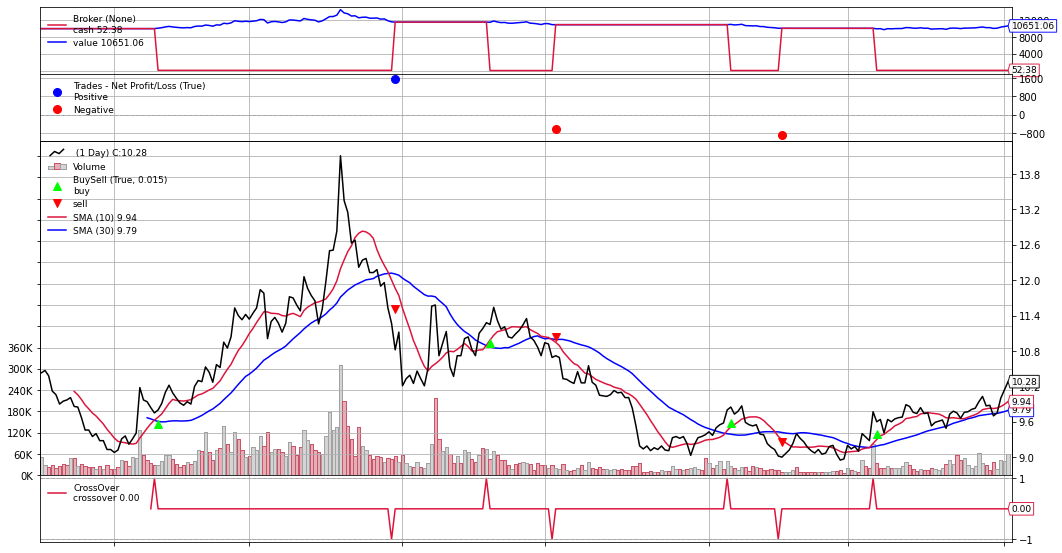

In [79]:
ts_code_list = list(df_choose_good[df_choose_good.ts_code.isin(c_list)].ts_code)
results_list = []
cerebro_list = []
for i,c in enumerate(ts_code_list):
    # if i == 0: 
    strategy_runner = Strategy_runner(strategy=SmaCross, ts_code=c, start_date=start_date, end_date=end_date, pro=True)
    cerebro, strat = strategy_runner.run()
    cerebro_list.append(cerebro)
    results_list.append(strat)

    strategy_runner.plot()
    # else:
    #     break

In [83]:
results_list[0].analyzers.DW.get_analysis()

AutoOrderedDict([('len', 58),
                 ('drawdown', 0.8080396550553314),
                 ('moneydown', 95.19999999999891),
                 ('max',
                  AutoOrderedDict([('len', 58),
                                   ('drawdown', 6.233448767569768),
                                   ('moneydown', 734.3999999999996)]))])

In [95]:
pos_num = lambda list_name:len(list(filter(lambda x: (x > 0), list_name)))
neg_num = lambda list_name:len(list_name) - pos_num(list_name)
drawdown_list=[r.analyzers.DW.get_analysis().max.drawdown for r in results_list]
ds = f'mean:{np.mean(drawdown_list)}, max:{np.max(drawdown_list)}, min:{np.min(drawdown_list)}, pos_num:{pos_num(drawdown_list)}, neg_num:{neg_num(drawdown_list)}'
print(ds)



mean:16.107454937001002, max:64.18389462876682, min:0.0, pos_num:15, neg_num:1


In [81]:
final_val = [cere.broker.getvalue() for cere in cerebro_list]
final_val

[11686.4,
 11585.86,
 9607.7,
 5781.139999999999,
 9856.64,
 12132.580000000002,
 12984.100000000002,
 10115.500000000002,
 10479.689999999999,
 10000.0,
 10542.179999999998,
 8914.91,
 9058.9,
 9488.189999999999,
 11628.720000000001,
 10651.06]

In [92]:
dif_money_list = [fv-10000 for fv in final_val]
fs = f'mean:{np.mean(dif_money_list)}, max:{np.max(dif_money_list)}, min:{np.min(dif_money_list)}, pos_num:{pos_num(dif_money_list)}, neg_num:{neg_num(dif_money_list)}'
print(fs)

mean:282.0981250000001, max:2984.100000000002, min:-4218.860000000001, pos_num:9, neg_num:7
